# Introduction

Goal:
All expectations of typical projects +
clearly describes why the setting is important and what is at stake in the results of the analysis. Even if the reader doesn’t know much about the subject, they know why they care about the results of your analysis.

2020 is an eventful year as the U.S Presidential Election occurs in November. The two candidates, Donald Trump and Joe Biden, have undoubtedly utilized Twitter as an avenue to increase their publicity, connect with supporters, and reach out to potential voters. We were interested in investigating and comparing the similarities and differences between their Twitter activity, both in the context of the election and more broadly, in the past year.

Our revised research question is: how does the Twitter activity of Biden and Trump differ? We will look at how their activities change over time as election nears, as well as behaviors throughout the entire observation period. These investigations would shed light on whether and how certain behaviors or attributes (time of day, length, sentiment) affect popularity, as well as how the candidates' behaviors change as election day nears.

# Data Import and Preparations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import nltk
import seaborn as sns
from datetime import date
from string import punctuation
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\camde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\camde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def tokenize(phrase):
    '''
    Returns the length of an array of individual words in the string phrase
    phrase: The string to be tokenized
    '''
    tokens = phrase.split()
    return len(tokens)

Sunil/Udai explain here how you guys pulled data from Twitter API.

#### explanation

#### Importing Biden's data into a dataframe, we print the top-5 rows of each column.

In [3]:
biden_tweets = pd.read_csv("biden_tweets.csv")
print(biden_tweets.head())

   Unnamed: 0                   id  \
0           0  1313663334286323714   
1           1  1313652765319557122   
2           2  1313646473393840128   
3           3  1313641691602202624   
4           4  1313633890289045504   

                                           full_text  \
0                    Please. https://t.co/acHR1Rf8hE   
1  I can’t wait for @KamalaHarris to make history...   
2  Ignore the polls, folks. There’s too much at s...   
3  Think about what it takes for a Black person t...   
4  Look, folks, I'm going to be honest: we'll try...   

                                            entities           created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-07 02:12:00   
1  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-07 01:30:00   
2  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-07 01:05:00   
3  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-07 00:46:00   
4  {'hashtags': [], 'symbols': [], 'user_mentions

#### Importing Trump's data into a dataframe, we print the top-5 rows of each column.

In [4]:
trump_tweets = pd.read_csv("trump_tweets.csv")
print(trump_tweets.head())

   Unnamed: 0                   id  \
0           0  1314035056441257985   
1           1  1314033009293656065   
2           2  1314028978806624256   
3           3  1314028699084259329   
4           4  1314027975185182721   

                                           full_text  \
0                            https://t.co/wHQx2qd8q2   
1  2010 to 2016 under Kamala Harris's watch as "T...   
2    https://t.co/4Wv5cCFEns https://t.co/kMvBv6Pu9I   
3                            https://t.co/rxqPqR4uqZ   
4                            https://t.co/xGevgI2wTO   

                                            entities           created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:49:05   
1  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:40:57   
2  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:24:56   
3  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:23:49   
4  {'hashtags': [], 'symbols': [], 'user_mentions

#### We then calculate the number of words in each tweet and store them in a new column in Biden and Trump dataframes.

In [5]:
# Biden

biden_word_counts_list = []
for tweet in biden_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    biden_word_counts_list.append(tweet_length)
biden_tweets["words"] = biden_word_counts_list

# Trump

trump_word_counts_list = []
for tweet in trump_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    trump_word_counts_list.append(tweet_length)
trump_tweets["words"] = trump_word_counts_list

#### Converting Tweet dates from string into datetime format prepares for our subsequent analysis. 
#### We obtained Biden and Trump tweets by day from the following source: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe

In [6]:
print("Before fixing the type, the dates have the type: " + str(type(biden_tweets["created_at"][0])))

# Biden
biden_tweets["created_at"] = pd.to_datetime(biden_tweets["created_at"], format='%Y-%m-%d %H:%M:%S')
biden_tweets['date']=biden_tweets['created_at'].dt.date
biden_tweetsbyday = biden_tweets["date"].value_counts().rename_axis('unique_dates').reset_index(name='tweets_each_day')

# Trump
trump_tweets["created_at"] = pd.to_datetime(trump_tweets["created_at"], format='%Y-%m-%d %H:%M:%S')
trump_tweets['date']=trump_tweets['created_at'].dt.date
trump_tweetsbyday=trump_tweets["date"].value_counts().rename_axis('unique_dates').reset_index(name='tweets_each_day')

print("After fixing the type, the dates have the type: " + str(type(biden_tweets["created_at"][0])))

Before fixing the type, the dates have the type: <class 'str'>
After fixing the type, the dates have the type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
# Check to see if the conversion preserved the date in the order we expect

print("The most recent tweet we have from Biden was tweeted on: " + str(biden_tweets["created_at"][0]))
print("Biden most recent tweet's year according to Python: " + str(biden_tweets["created_at"][0].year))
print("Biden most recent tweet's month according to Python: " + str(biden_tweets["created_at"][0].month))
print("Biden most recent tweet's day according to Python: " + str(biden_tweets["created_at"][0].day))
print("It appears the conversion was successful")

The most recent tweet we have from Biden was tweeted on: 2020-10-07 02:12:00
Biden most recent tweet's year according to Python: 2020
Biden most recent tweet's month according to Python: 10
Biden most recent tweet's day according to Python: 7
It appears the conversion was successful


In [8]:
# Check to see if we can determine how many days pass between two dates

print("The most recent tweet we have from Biden was tweeted on: " + str(biden_tweets["created_at"][0]))
print("The oldest tweet we have from Biden was tweeted on: " + 
      str(biden_tweets["created_at"][len(biden_tweets["created_at"])-1]))
test_start = biden_tweets["created_at"][len(biden_tweets["created_at"])-1]
test_end = biden_tweets["created_at"][0]
test_start_date = date(test_start.year, test_start.month, test_start.day)
test_end_date = date(test_end.year, test_end.month, test_end.day)
delta = test_end_date - test_start_date
print("Biden's tweets span " + str(delta.days) + " days")
print("2020 is a leap year with 366 days, so the result above is correct.")

# Source: https://www.w3resource.com/python-exercises/python-basic-exercise-14.php

The most recent tweet we have from Biden was tweeted on: 2020-10-07 02:12:00
The oldest tweet we have from Biden was tweeted on: 2019-10-16 02:35:02
Biden's tweets span 357 days
2020 is a leap year with 366 days, so the result above is correct.


In [9]:
# Add a column to the Biden and Trump data frames that shows how many days before the 2020 election each tweet was tweeted

# Start with Biden

biden_days_to_election = np.zeros(len(biden_tweets["created_at"]))
biden_index = 0
election_date = date(2020, 11, 3)
for i in range(len(biden_tweets["created_at"])):
    temp_biden_date = biden_tweets["created_at"][biden_index]
    biden_tweet_date = date(temp_biden_date.year, temp_biden_date.month, temp_biden_date.day)
    biden_delta = election_date - biden_tweet_date
    biden_days_to_election[biden_index] = biden_delta.days
    biden_index += 1
biden_tweets["days_to_election"] = biden_days_to_election
print("Updated Biden data frame" + "\n" + str(biden_tweets.head()))

Updated Biden data frame
   Unnamed: 0                   id  \
0           0  1313663334286323714   
1           1  1313652765319557122   
2           2  1313646473393840128   
3           3  1313641691602202624   
4           4  1313633890289045504   

                                           full_text  \
0                    Please. https://t.co/acHR1Rf8hE   
1  I can’t wait for @KamalaHarris to make history...   
2  Ignore the polls, folks. There’s too much at s...   
3  Think about what it takes for a Black person t...   
4  Look, folks, I'm going to be honest: we'll try...   

                                            entities          created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 02:12:00   
1  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 01:30:00   
2  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 01:05:00   
3  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 00:46:00   
4  {'hashtags': [], 'symbols'

In [10]:
# Let's also add a "days_to_election" column to the Biden tweets by day dataframe

biden_days_to_election = np.zeros(len(biden_tweetsbyday["unique_dates"]))
biden_index = 0
election_date = date(2020, 11, 3)
for i in range(len(biden_tweetsbyday["unique_dates"])):
    temp_biden_date = biden_tweetsbyday["unique_dates"][biden_index]
    biden_tweet_date = date(temp_biden_date.year, temp_biden_date.month, temp_biden_date.day)
    biden_delta = election_date - biden_tweet_date
    biden_days_to_election[biden_index] = biden_delta.days
    biden_index += 1
biden_tweetsbyday["days_to_election"] = biden_days_to_election
print("Updated Biden data frame" + "\n" + str(biden_tweetsbyday.head()))

Updated Biden data frame
  unique_dates  tweets_each_day  days_to_election
0   2020-09-30               39              34.0
1   2019-11-21               35             348.0
2   2020-10-06               31              28.0
3   2020-03-04               27             244.0
4   2020-03-16               27             232.0


In [11]:
# The results for Biden look good. Let's do the same thing for Trump's tweets

# Update the Trump tweets data frame

trump_days_to_election = np.zeros(len(trump_tweets["created_at"]))
trump_index = 0
election_date = date(2020, 11, 3)
for i in range(len(trump_tweets["created_at"])):
    temp_trump_date = trump_tweets["created_at"][trump_index]
    trump_tweet_date = date(temp_trump_date.year, temp_trump_date.month, temp_trump_date.day)
    trump_delta = election_date - trump_tweet_date
    trump_days_to_election[trump_index] = trump_delta.days
    trump_index += 1
trump_tweets["days_to_election"] = trump_days_to_election
print("Updated Trump data frame" + "\n" + str(trump_tweets.head()))

Updated Trump data frame
   Unnamed: 0                   id  \
0           0  1314035056441257985   
1           1  1314033009293656065   
2           2  1314028978806624256   
3           3  1314028699084259329   
4           4  1314027975185182721   

                                           full_text  \
0                            https://t.co/wHQx2qd8q2   
1  2010 to 2016 under Kamala Harris's watch as "T...   
2    https://t.co/4Wv5cCFEns https://t.co/kMvBv6Pu9I   
3                            https://t.co/rxqPqR4uqZ   
4                            https://t.co/xGevgI2wTO   

                                            entities          created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:49:05   
1  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:40:57   
2  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:24:56   
3  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:23:49   
4  {'hashtags': [], 'symbols'

In [12]:
# Also update Trump tweets by day

trump_days_to_election = np.zeros(len(trump_tweetsbyday["unique_dates"]))
trump_index = 0
election_date = date(2020, 11, 3)
for i in range(len(trump_tweetsbyday["unique_dates"])):
    temp_trump_date = trump_tweetsbyday["unique_dates"][trump_index]
    trump_tweet_date = date(temp_trump_date.year, temp_trump_date.month, temp_trump_date.day)
    trump_delta = election_date - trump_tweet_date
    trump_days_to_election[trump_index] = trump_delta.days
    trump_index += 1
trump_tweetsbyday["days_to_election"] = trump_days_to_election
print("Updated Biden data frame" + "\n" + str(trump_tweetsbyday.head()))

Updated Biden data frame
  unique_dates  tweets_each_day  days_to_election
0   2020-09-30               62              34.0
1   2020-10-07               48              27.0
2   2020-08-25               45              70.0
3   2020-09-08               44              56.0
4   2020-09-18               41              46.0


# Exploratory Data Analysis

#### We first compute summary statistics for the "full_text", "favourite", and "retweet" columns.

In [13]:
biden_total_words = 0 # The number of words Biden used across all the Tweets we collected
biden_word_counts_list = [] # A list of the word count for each tweet
for tweet in biden_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    biden_word_counts_list.append(tweet_length)                 
    biden_total_words += tweet_length
print("Biden words tweeted: " + "{:.0f}".format(biden_total_words))
biden_mean_wordcount = np.mean(biden_word_counts_list)
print("Mean number of words in Biden tweets: " + "{:.2f}".format(biden_mean_wordcount))
biden_median_wordcount = np.median(biden_word_counts_list)
print("Median number of words in Biden tweets: " + "{:.2f}".format(biden_median_wordcount))
biden_mode_wordcount = statistics.mode(biden_word_counts_list)
print("Mode number of words in Biden tweets: " + "{:.0f}".format(biden_mode_wordcount))
biden_minimum_words = min(biden_word_counts_list)
print("The least number of words Biden used in a tweet was: " + "{:.0f}".format(biden_minimum_words))
biden_maximum_words = max(biden_word_counts_list)
print("The most number of words Biden used in a tweet was: " + "{:.0f}".format(biden_maximum_words))
biden_stddev_wordcount = np.std(biden_word_counts_list)
print("Standard deviation of number of words in Biden tweets: " + "{:.2f}".format(biden_stddev_wordcount))

trump_total_words = 0 # The number of words Trump used across all the Tweets we collected
trump_word_counts_list = [] # A list of the word count for each tweet
for tweet in trump_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    trump_word_counts_list.append(tweet_length)                 
    trump_total_words += tweet_length
print("\nTrump words tweeted: " + str(trump_total_words))
trump_mean_wordcount = np.mean(trump_word_counts_list) #Mean number of words in each of Trump's tweets
print("Mean number of words in each Trump tweet: {:.2f}".format(trump_mean_wordcount))
trump_median_wordcount = np.median(trump_word_counts_list)
print("Median number of words in each Trump tweet: {:.2f}".format(trump_median_wordcount))
trump_mode_wordcount = statistics.mode(trump_word_counts_list)
print("Mode number of words in each Trump tweet: {:.2f}".format(trump_mode_wordcount))
trump_minimum_words = min(trump_word_counts_list)
print("The least number of words Trump used in a tweet was: {:.2f}".format(trump_minimum_words))
trump_maximum_words = max(trump_word_counts_list)
print("The most number of words Trump used in a tweet was: {:.2f}".format(trump_maximum_words))
trump_stddev_wordcount = np.std(trump_word_counts_list)
print("Standard deviation of number of words in each Trump tweet: {:.2f}".format(trump_stddev_wordcount))

Biden words tweeted: 100838
Mean number of words in Biden tweets: 32.70
Median number of words in Biden tweets: 35.00
Mode number of words in Biden tweets: 43
The least number of words Biden used in a tweet was: 1
The most number of words Biden used in a tweet was: 59
Standard deviation of number of words in Biden tweets: 12.75

Trump words tweeted: 33048
Mean number of words in each Trump tweet: 20.57
Median number of words in each Trump tweet: 16.00
Mode number of words in each Trump tweet: 1.00
The least number of words Trump used in a tweet was: 1.00
The most number of words Trump used in a tweet was: 59.00
Standard deviation of number of words in each Trump tweet: 17.83


In [14]:
biden_favorites = biden_tweets["favourite"]
biden_total_favorites = biden_favorites.sum()
print("Biden tweet favorites: " + "{:.0f}".format(biden_total_favorites))
biden_mean_favorites = np.mean(biden_favorites)
print("Mean number of favorites for Biden tweets: " + "{:.2f}".format(biden_mean_favorites))
biden_median_favorites = np.median(biden_favorites)
print("Median number of favorites for Biden tweets: " + "{:.2f}".format(biden_median_favorites))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of favorites
# biden_mode_favorites = statistics.mode(biden_favorites)
# print("Mode number of favorites in each Biden tweet: " + str(biden_mode_favorites))
biden_minimum_favorites = min(biden_favorites)
print("The least number of favorites a Biden tweet received was: " + "{:.0f}".format(biden_minimum_favorites))
biden_maximum_favorites = max(biden_favorites)
print("The most number of favorites a Biden tweet received was: " + "{:.0f}".format(biden_maximum_favorites))
biden_stddev_favorites = np.std(biden_favorites)
print("Standard deviation of number of favorites for Biden tweets: " + "{:.2f}".format(biden_stddev_favorites))

trump_favorites = trump_tweets["favourite"]
trump_total_favorites = trump_favorites.sum()
print("\nTrump tweet favorites: {:.2f}".format(trump_total_favorites))
trump_mean_favorites = np.mean(trump_favorites)
print("Mean number of favorites for Trump tweets: {:.2f}".format(trump_mean_favorites))
trump_median_favorites = np.median(trump_favorites)
print("Median number of favorites for Trump tweets: {:.2f}".format(trump_median_favorites))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of favorites
# trump_mode_favorites = statistics.mode(trump_favorites)
# print("Mode number of favorites in each Trump tweet: " + str(trump_mode_favorites))
trump_minimum_favorites = min(trump_favorites)
print("The least number of favorites a Trump tweet received was: {:.2f}".format(trump_minimum_favorites))
trump_maximum_favorites = max(trump_favorites)
print("The most number of favorites a Trump tweet received was: {:.2f}".format(trump_maximum_favorites))
trump_stddev_favorites = np.std(trump_favorites)
print("Standard deviation of number of retweets for Trump tweets: {:.2f}".format(trump_stddev_favorites))


Biden tweet favorites: 146530712
Mean number of favorites for Biden tweets: 47513.20
Median number of favorites for Biden tweets: 19678.50
The least number of favorites a Biden tweet received was: 34
The most number of favorites a Biden tweet received was: 1890801
Standard deviation of number of favorites for Biden tweets: 92504.77

Trump tweet favorites: 161042301.00
Mean number of favorites for Trump tweets: 100213.01
Median number of favorites for Trump tweets: 74137.00
The least number of favorites a Trump tweet received was: 0.00
The most number of favorites a Trump tweet received was: 1886146.00
Standard deviation of number of retweets for Trump tweets: 98380.33


In [15]:
biden_retweets = biden_tweets["retweets"]
biden_total_retweets = biden_retweets.sum()
print("Biden retweets: " + "{:.0f}".format(biden_total_retweets))
biden_mean_retweets = np.mean(biden_retweets)
print("Mean number of retweets for Biden tweets: " + "{:.2f}".format(biden_mean_retweets))
biden_median_retweets = np.median(biden_retweets)
print("Median number of retweets for Biden tweets: " + "{:.2f}".format(biden_median_retweets))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of retweets
# biden_mode_retweets = statistics.mode(biden_retweets)
# print("Mode number of retweets in each Biden tweet: " + str(biden_mode_retweets))
biden_minimum_retweets = min(biden_retweets)
print("The least number of retweets a Biden tweet received was: " + "{:.0f}".format(biden_minimum_retweets))
biden_maximum_retweets = max(biden_retweets)
print("The most number of retweets a Biden tweet received was: " + "{:.0f}".format(biden_maximum_retweets))
biden_stddev_retweets = np.std(biden_retweets)
print("Standard deviation of number of retweets for each Biden tweet: " + "{:.2f}".format(biden_stddev_retweets))

trump_retweets = trump_tweets["retweets"]
trump_total_retweets = trump_retweets.sum()
print("\nTrump retweets: " + str(trump_total_retweets))
trump_mean_retweets = np.mean(trump_retweets)
print("Mean number of retweets for Trump tweets: {:.2f}".format(trump_mean_retweets))
trump_median_retweets = np.median(trump_retweets)
print("Median number of retweets for Trump tweets: {:.2f}".format(trump_median_retweets))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of retweets
# trump_mode_retweets = statistics.mode(trump_retweets)
# print("Mode number of retweets in each Trump tweet: " + str(trump_mode_retweets))
trump_minimum_retweets = min(trump_retweets)
print("The least number of retweets a Trump tweet received was: {:.2f}".format(trump_minimum_retweets))
trump_maximum_retweets = max(trump_retweets)
print("The most number of retweets a Trump tweet received was: {:.2f}".format(trump_maximum_retweets))
trump_stddev_retweets = np.std(trump_retweets)
print("Standard deviation of number of retweets for each Trump tweet: {:.2f}".format(trump_stddev_retweets))

Biden retweets: 27712385
Mean number of retweets for Biden tweets: 8985.86
Median number of retweets for Biden tweets: 4409.00
The least number of retweets a Biden tweet received was: 11
The most number of retweets a Biden tweet received was: 327830
Standard deviation of number of retweets for each Biden tweet: 15350.52

Trump retweets: 37080009
Mean number of retweets for Trump tweets: 23074.06
Median number of retweets for Trump tweets: 18168.00
The least number of retweets a Trump tweet received was: 0.00
The most number of retweets a Trump tweet received was: 416082.00
Standard deviation of number of retweets for each Trump tweet: 19312.65


In [16]:
# Statistics for "language" column
biden_language_counts = biden_tweets["language"].value_counts()
print("Raw number of Biden tweets in each language: " + "\n" + str(biden_language_counts))
print("Percent of tweets in each language: " + "\n" + str(100 * biden_language_counts / 
    len(biden_tweets.index))) # Percentage breakdown of each language

number_of_trump_tweets = len(trump_tweets.index)
print("\nRaw number of Trump tweets in each language: " + "\n" + str(trump_tweets["language"].value_counts()))
print("Fraction of tweets in each language: " + "\n" + str(trump_tweets["language"].value_counts() / 
    number_of_trump_tweets)) # Percentage breakdown of each language

Raw number of Biden tweets in each language: 
en     3055
es       19
und       8
ro        1
fr        1
Name: language, dtype: int64
Percent of tweets in each language: 
en     99.059663
es      0.616083
und     0.259403
ro      0.032425
fr      0.032425
Name: language, dtype: float64

Raw number of Trump tweets in each language: 
en     1248
und     353
fr        3
pt        1
fa        1
es        1
Name: language, dtype: int64
Fraction of tweets in each language: 
en     0.776602
und    0.219664
fr     0.001867
pt     0.000622
fa     0.000622
es     0.000622
Name: language, dtype: float64


#### Next, we compare histograms plotting Biden and Trump's posts' certain attributes against number of posts in order to see how their Twitter activities differ from one another in length, time, and sentiment, as well as how well-received their activities are.

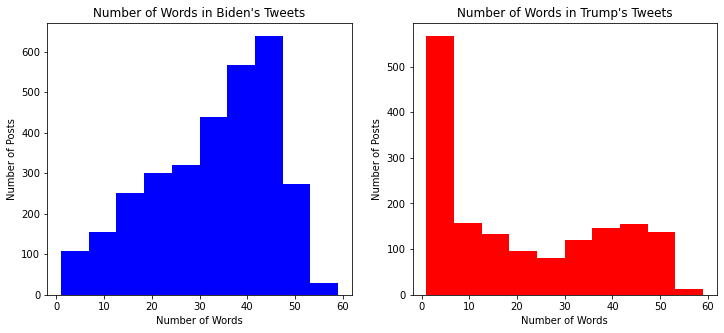

In [17]:
# Number of words

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(biden_word_counts_list, color = "blue")
ax1.set_title("Number of Words in Biden's Tweets")
ax1.set_xlabel("Number of Words")
ax1.set_ylabel("Number of Posts")

ax2.hist(trump_word_counts_list, color = "red")
ax2.set_title("Number of Words in Trump's Tweets")
ax2.set_xlabel("Number of Words")
ax2.set_ylabel("Number of Posts")

plt.show()

As seen in the side-by-side histograms above comparing the number of words in Biden's and Trump's tweets, Biden's distribution clearly has a higher median with a tail to the left. On the contrary, Trump's distribution exhibits a smaller median with a tail to the right. This signifies that on average, Biden posts longer tweets whereas a majority of Trump's tweets are short (0-5 words had an abnormally high distribution compared to other categories).

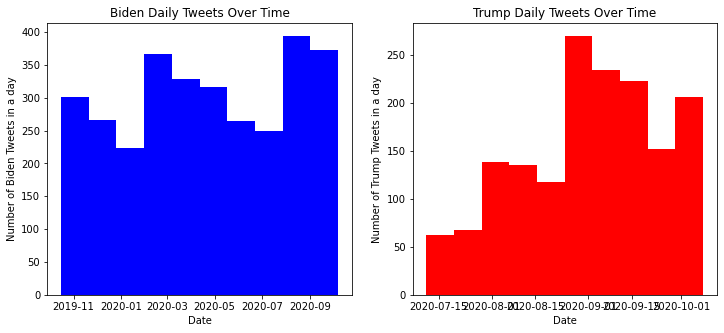

In [18]:
# Tweets per day

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(biden_tweets['date'], color = "blue")
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Biden Tweets in a day')
ax1.set_title("Biden Daily Tweets Over Time")


ax2.hist(trump_tweets['date'], color = "red")
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Trump Tweets in a day')
ax2.set_title("Trump Daily Tweets Over Time")

plt.show()

As seen above, Biden seemed to post roughly the same amount back in November 2019 and September 2020. However, it must be noted that we collected Tweets of Biden throughout a longer period of time since November 2019 whereas we collected Trump's tweets since July 2020 due to the availability of data. This is a potential limitation that will be addressed later on. In order to allow for similar comparisons, we plot Biden and Trump's daily tweets over time from the same period from July to October 2020 below.

# should we do this or no? looking at the section above it seems that biden's will look similar to trump, so i think we could do it. i'm skipping this part for now, it should be just loc(condition: when date is after july 2020).

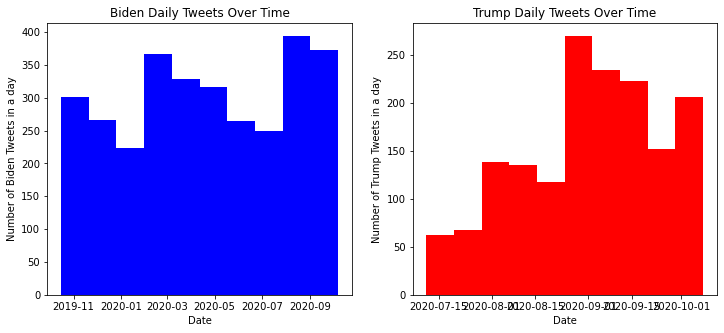

In [19]:
# Tweets per day

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(biden_tweets['date'], color = "blue")
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Biden Tweets in a day')
ax1.set_title("Biden Daily Tweets Over Time")


ax2.hist(trump_tweets['date'], color = "red")
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Trump Tweets in a day')
ax2.set_title("Trump Daily Tweets Over Time")

plt.show()

#### Next, we plot the number of favourites of each candidate against number of posts, obtaining results that are highly concentrated to the left with some upper outliers.

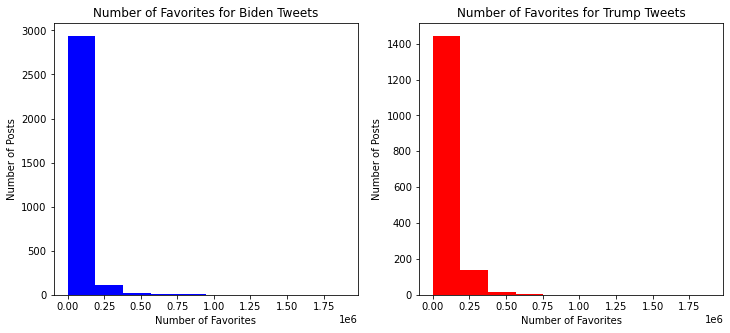

In [20]:
# Favorites

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(biden_favorites, color = "blue")
ax1.set_title("Number of Favorites for Biden Tweets")
ax1.set_xlabel("Number of Favorites")
ax1.set_ylabel("Number of Posts")

ax2.hist(trump_favorites, color = "red")
ax2.set_title("Number of Favorites for Trump Tweets")
ax2.set_xlabel("Number of Favorites")
ax2.set_ylabel("Number of Posts")

plt.show()

#### To address this and reveal more meaningful relationships between the two variables, we log the number of favourites and plot against number of posts:

C:\Users\camde\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\camde\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\camde\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


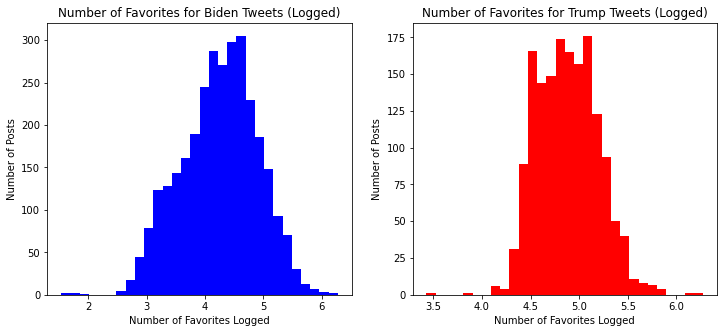

In [21]:
# Favorites logged

biden_favouritelogged=biden_tweets.copy()
biden_favouritelogged['favourite']=np.log10(biden_favouritelogged['favourite'])
biden_favouritelogged=biden_favouritelogged.replace([np.inf, -np.inf], np.nan)
trump_favouritelogged=trump_tweets.copy()
trump_favouritelogged['favourite']=np.log10(trump_favouritelogged['favourite'])
trump_favouritelogged=trump_favouritelogged.replace([np.inf, -np.inf], np.nan)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(biden_favouritelogged["favourite"], bins = 30, color = "blue")
ax1.set_title("Number of Favorites for Biden Tweets (Logged)")
ax1.set_xlabel("Number of Favorites Logged")
ax1.set_ylabel("Number of Posts")

ax2.hist(trump_favouritelogged["favourite"], bins = 30, color = "red")
ax2.set_title("Number of Favorites for Trump Tweets (Logged)")
ax2.set_xlabel("Number of Favorites Logged")
ax2.set_ylabel("Number of Posts")

plt.show()

## As seen above, this gives a much more meaningful view of the relationship bewteen the two variables. Unfinished__

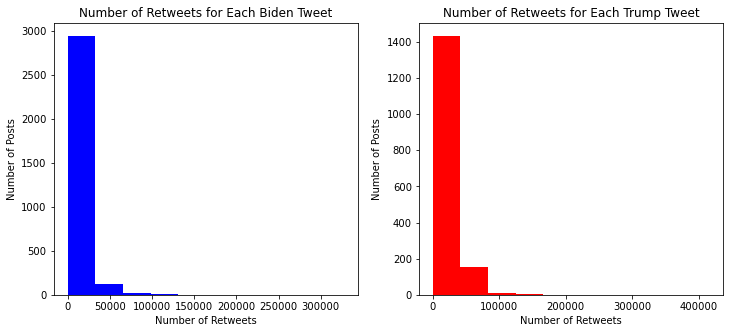

In [22]:
# Retweets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(biden_retweets, color="blue")
ax1.set_title("Number of Retweets for Each Biden Tweet")
ax1.set_xlabel("Number of Retweets")
ax1.set_ylabel("Number of Posts")

ax2.hist(trump_retweets, color="red")
ax2.set_title("Number of Retweets for Each Trump Tweet")
ax2.set_xlabel("Number of Retweets")
ax2.set_ylabel("Number of Posts")

plt.show()

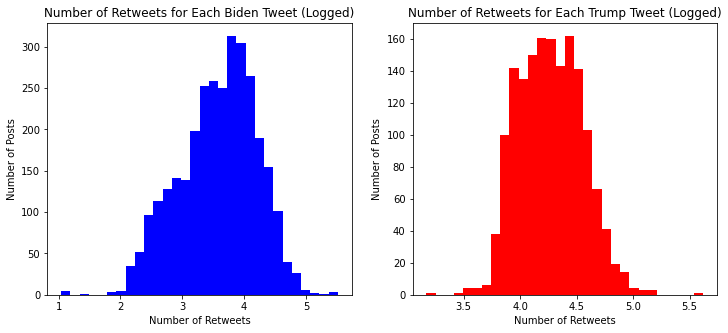

In [23]:
# Retweets logged

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

biden_retweetslogged=biden_tweets.copy()
biden_retweetslogged['retweets']=np.log10(biden_retweetslogged['retweets'])
biden_retweetslogged=biden_retweetslogged.replace([np.inf, -np.inf], np.nan)
trump_retweetslogged=trump_tweets.copy()
trump_retweetslogged['retweets']=np.log10(trump_retweetslogged['retweets'])
trump_retweetslogged=trump_retweetslogged.replace([np.inf, -np.inf], np.nan)

ax1.hist(biden_retweetslogged["retweets"], bins = 30, color="blue")
ax1.set_title("Number of Retweets for Each Biden Tweet (Logged)")
ax1.set_xlabel("Number of Retweets")
ax1.set_ylabel("Number of Posts")

ax2.hist(trump_retweetslogged["retweets"], bins = 30, color="red")
ax2.set_title("Number of Retweets for Each Trump Tweet (Logged)")
ax2.set_xlabel("Number of Retweets")
ax2.set_ylabel("Number of Posts")

plt.show()

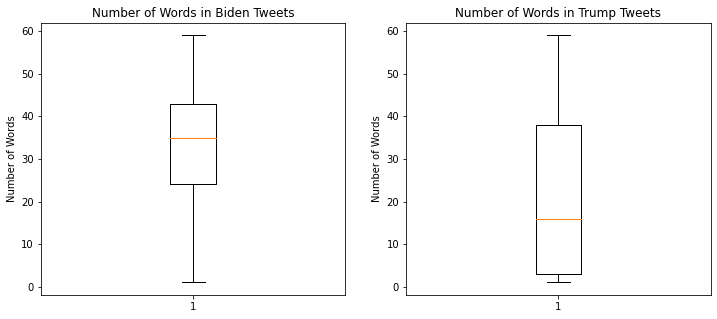

In [24]:
# Number of Words

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.boxplot(biden_word_counts_list)
ax1.set_title("Number of Words in Biden Tweets")
ax1.set_ylabel("Number of Words")

ax2.boxplot(trump_word_counts_list)
ax2.set_title("Number of Words in Trump Tweets")
ax2.set_ylabel("Number of Words")

plt.show()

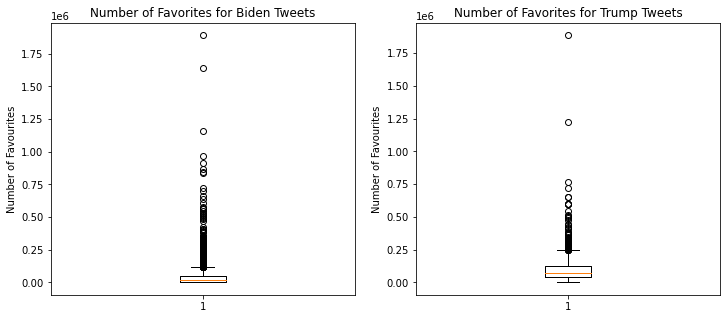

In [25]:
# Favorites

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.boxplot(biden_favorites)
ax1.set_title("Number of Favorites for Biden Tweets")
ax1.set_ylabel("Number of Favourites")

ax2.boxplot(trump_favorites)
ax2.set_title("Number of Favorites for Trump Tweets")
ax2.set_ylabel("Number of Favourites")

plt.show()

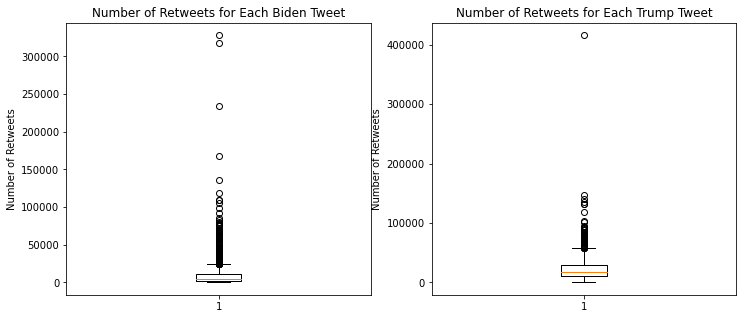

In [26]:
# Retweets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.boxplot(biden_retweets)
ax1.set_title("Number of Retweets for Each Biden Tweet")
ax1.set_ylabel("Number of Retweets")

ax2.boxplot(trump_retweets)
ax2.set_title("Number of Retweets for Each Trump Tweet")
ax2.set_ylabel("Number of Retweets")

plt.show()

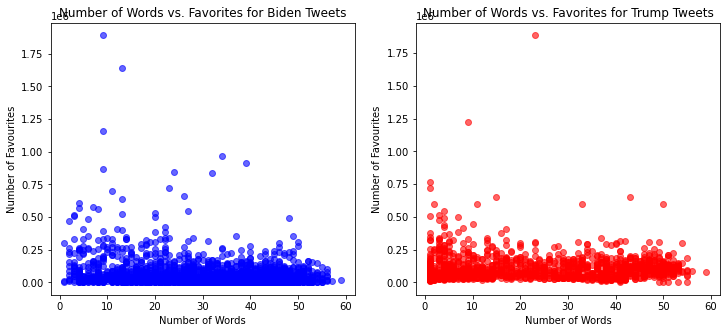

In [27]:
# Number of Words vs. Favorites

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x = biden_word_counts_list, y = biden_favorites, alpha = 0.6, color="blue")
ax1.set_title("Number of Words vs. Favorites for Biden Tweets")
ax1.set_xlabel("Number of Words")
ax1.set_ylabel("Number of Favourites")

ax2.scatter(x = trump_word_counts_list, y = trump_favorites, alpha = 0.6, color="red")
ax2.set_title("Number of Words vs. Favorites for Trump Tweets")
ax2.set_xlabel("Number of Words")
ax2.set_ylabel("Number of Favourites")

plt.show()

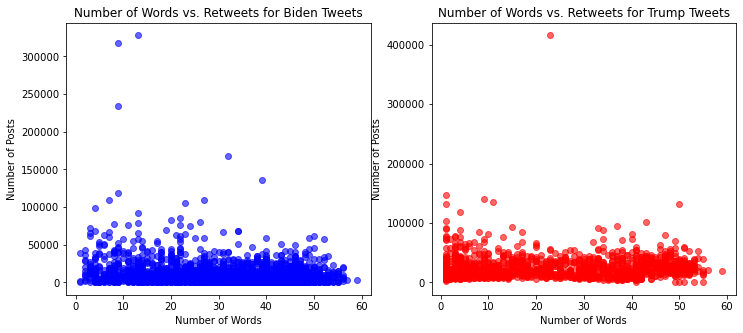

In [28]:
# Number of Words vs. Retweets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x = biden_word_counts_list, y = biden_retweets, alpha = 0.6, color="blue")
ax1.set_title("Number of Words vs. Retweets for Biden Tweets")
ax1.set_xlabel("Number of Words")
ax1.set_ylabel("Number of Posts")

ax2.scatter(x = trump_word_counts_list, y = trump_retweets, alpha = 0.6, color="red")
ax2.set_title("Number of Words vs. Retweets for Trump Tweets")
ax2.set_xlabel("Number of Words")
ax2.set_ylabel("Number of Posts")

plt.show()

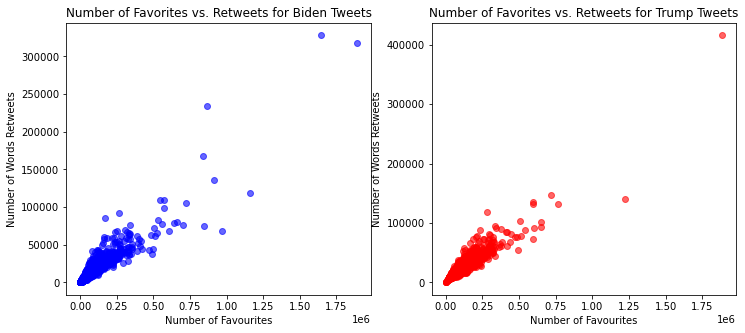

In [29]:
# Number of Favorites vs. Retweets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x = biden_favorites, y = biden_retweets, alpha = 0.6, color="blue")
ax1.set_title("Number of Favorites vs. Retweets for Biden Tweets")
ax1.set_xlabel("Number of Favourites")
ax1.set_ylabel("Number of Words Retweets")

ax2.scatter(x = trump_favorites, y = trump_retweets, alpha = 0.6, color="red")
ax2.set_title("Number of Favorites vs. Retweets for Trump Tweets")
ax2.set_xlabel("Number of Favourites")
ax2.set_ylabel("Number of Words Retweets")

plt.show()

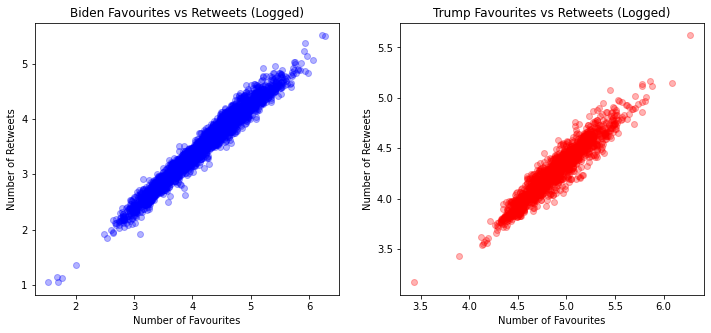

In [30]:
# Logged favorites vs. retweets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(biden_favouritelogged.favourite, biden_retweetslogged.retweets, alpha=0.3, color="blue")
ax1.set_xlabel('Number of Favourites')
ax1.set_ylabel('Number of Retweets')
ax1.set_title('Biden Favourites vs Retweets (Logged)')

ax2.scatter(trump_favouritelogged.favourite, trump_retweetslogged.retweets, alpha=0.3, color="red")
ax2.set_xlabel('Number of Favourites')
ax2.set_ylabel('Number of Retweets')
ax2.set_title('Trump Favourites vs Retweets (Logged)')

plt.show()

In [31]:
# Summary stats for the full_text column
trump_total_words = 0 # The number of words Trump used across all the Tweets we collected
trump_word_counts_list = [] # A list of the word count for each tweet
for tweet in trump_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    trump_word_counts_list.append(tweet_length)                 
    trump_total_words += tweet_length
print("Trump words tweeted: " + str(trump_total_words))
trump_mean_wordcount = np.mean(trump_word_counts_list) #Mean number of words in each of Trump's tweets
print("Mean number of words in each Trump tweet: {:.2f}".format(trump_mean_wordcount))
trump_median_wordcount = np.median(trump_word_counts_list)
print("Median number of words in each Trump tweet: {:.2f}".format(trump_median_wordcount))
trump_mode_wordcount = statistics.mode(trump_word_counts_list)
print("Mode number of words in each Trump tweet: {:.2f}".format(trump_mode_wordcount))
trump_minimum_words = min(trump_word_counts_list)
print("The least number of words Trump used in a tweet was: {:.2f}".format(trump_minimum_words))
trump_maximum_words = max(trump_word_counts_list)
print("The most number of words Trump used in a tweet was: {:.2f}".format(trump_maximum_words))
trump_stddev_wordcount = np.std(trump_word_counts_list)
print("Standard deviation of number of words in each Trump tweet: {:.2f}".format(trump_stddev_wordcount))

Trump words tweeted: 33048
Mean number of words in each Trump tweet: 20.57
Median number of words in each Trump tweet: 16.00
Mode number of words in each Trump tweet: 1.00
The least number of words Trump used in a tweet was: 1.00
The most number of words Trump used in a tweet was: 59.00
Standard deviation of number of words in each Trump tweet: 17.83


In [32]:
# Summary stats for the "favourite" column
trump_favorites = trump_tweets["favourite"]
trump_total_favorites = trump_favorites.sum()
print("Trump tweet favorites: {:.2f}".format(trump_total_favorites))
trump_mean_favorites = np.mean(trump_favorites)
print("Mean number of favorites for Trump tweets: {:.2f}".format(trump_mean_favorites))
trump_median_favorites = np.median(trump_favorites)
print("Median number of favorites for Trump tweets: {:.2f}".format(trump_median_favorites))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of favorites
# trump_mode_favorites = statistics.mode(trump_favorites)
# print("Mode number of favorites in each Trump tweet: " + str(trump_mode_favorites))
trump_minimum_favorites = min(trump_favorites)
print("The least number of favorites a Trump tweet received was: {:.2f}".format(trump_minimum_favorites))
trump_maximum_favorites = max(trump_favorites)
print("The most number of favorites a Trump tweet received was: {:.2f}".format(trump_maximum_favorites))
trump_stddev_favorites = np.std(trump_favorites)
print("Standard deviation of number of retweets for Trump tweets: {:.2f}".format(trump_stddev_favorites))


Trump tweet favorites: 161042301.00
Mean number of favorites for Trump tweets: 100213.01
Median number of favorites for Trump tweets: 74137.00
The least number of favorites a Trump tweet received was: 0.00
The most number of favorites a Trump tweet received was: 1886146.00
Standard deviation of number of retweets for Trump tweets: 98380.33


In [33]:
# Summary stats for the "retweets" column
trump_retweets = trump_tweets["retweets"]
trump_total_retweets = trump_retweets.sum()
print("Trump retweets: " + str(trump_total_retweets))
trump_mean_retweets = np.mean(trump_retweets)
print("Mean number of retweets for Trump tweets: {:.2f}".format(trump_mean_retweets))
trump_median_retweets = np.median(trump_retweets)
print("Median number of retweets for Trump tweets: {:.2f}".format(trump_median_retweets))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of retweets
# trump_mode_retweets = statistics.mode(trump_retweets)
# print("Mode number of retweets in each Trump tweet: " + str(trump_mode_retweets))
trump_minimum_retweets = min(trump_retweets)
print("The least number of retweets a Trump tweet received was: {:.2f}".format(trump_minimum_retweets))
trump_maximum_retweets = max(trump_retweets)
print("The most number of retweets a Trump tweet received was: {:.2f}".format(trump_maximum_retweets))
trump_stddev_retweets = np.std(trump_retweets)
print("Standard deviation of number of retweets for each Trump tweet: {:.2f}".format(trump_stddev_retweets))

Trump retweets: 37080009
Mean number of retweets for Trump tweets: 23074.06
Median number of retweets for Trump tweets: 18168.00
The least number of retweets a Trump tweet received was: 0.00
The most number of retweets a Trump tweet received was: 416082.00
Standard deviation of number of retweets for each Trump tweet: 19312.65


In [34]:
# Statistics for "language" column

print("Raw number of tweets in each language: " + "\n" + str(trump_tweets["language"].value_counts()))
print("Fraction of tweets in each language: " + "\n" + str(trump_tweets["language"].value_counts() / 
    len(biden_tweets.index))) # Percentage breakdown of each language

Raw number of tweets in each language: 
en     1248
und     353
fr        3
pt        1
fa        1
es        1
Name: language, dtype: int64
Fraction of tweets in each language: 
en     0.404669
und    0.114462
fr     0.000973
pt     0.000324
fa     0.000324
es     0.000324
Name: language, dtype: float64


# Analysis 2

#### Here are some sources that we used throughout this section of our notebook to help us perform our analysis

Source for t test for linear regression with OLS: https://github.com/marcopeix/ISL-linear-regression/blob/master/Linear%20Regression.ipynb

Finding specific values from the OLS table:

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.t_test.html
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.tvalues.html
https://stackoverflow.com/questions/37508158/how-to-extract-a-particular-value-from-the-ols-summary-in-pandas/41212509

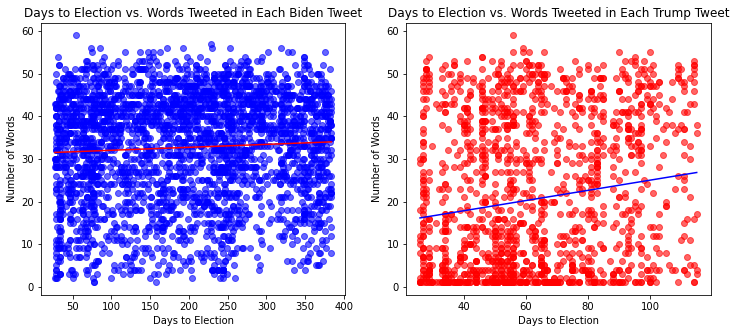

Regression slope (Biden): 0.01
Test statistic for the significance of the slope of the regression line coefficient (Biden): 3.18
P value for the significance of the slope of the regression line coefficient (Biden): 0.001

Regression slope (Trump): 0.12
Test statistic for the significance of the slope of the regression line coefficient (Trump): 6.17
P value for the significance of the slope of the regression line coefficient (Trump): 0.000


In [35]:
# Biden words vs. days to election

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

b_days_words_model = linear_model.LinearRegression().fit(biden_tweets[["days_to_election"]], biden_tweets["words"])
b_days_words_predict = b_days_words_model.predict(biden_tweets[["days_to_election"]])

ax1.scatter(biden_tweets["days_to_election"], biden_tweets["words"], alpha = 0.6, color = "blue")
ax1.plot(biden_tweets["days_to_election"], b_days_words_predict, c = "red")
ax1.set_title("Days to Election vs. Words Tweeted in Each Biden Tweet")
ax1.set_xlabel("Days to Election")
ax1.set_ylabel("Number of Words")

t_days_words_model = linear_model.LinearRegression().fit(trump_tweets[["days_to_election"]], trump_tweets["words"])
t_days_words_predict = t_days_words_model.predict(trump_tweets[["days_to_election"]])

ax2.scatter(trump_tweets["days_to_election"], trump_tweets["words"], alpha = 0.6, color = "red")
ax2.plot(trump_tweets["days_to_election"], t_days_words_predict, c = "blue")
ax2.set_title("Days to Election vs. Words Tweeted in Each Trump Tweet")
ax2.set_xlabel("Days to Election")
ax2.set_ylabel("Number of Words")

plt.show()

b_days_words_est = sm.OLS(biden_tweets["words"], sm.add_constant(biden_tweets[["days_to_election"]]))
b_days_words_est2 = b_days_words_est.fit()
# print(b_days_words_est2.summary()) # Prints the whole summary table for the regression line
print("Regression slope (Biden): " + "{:.2f}".format(b_days_words_est2.params[1]))
print("Test statistic for the significance of the slope of the regression line coefficient (Biden): " + "{:.2f}".format(b_days_words_est2.tvalues[1]))
print("P value for the significance of the slope of the regression line coefficient (Biden): " + "{:.3f}".format(b_days_words_est2.pvalues[1]))

print("")

t_days_words_est = sm.OLS(trump_tweets["words"], sm.add_constant(trump_tweets[["days_to_election"]]))
t_days_words_est2 = t_days_words_est.fit()
# print(t_days_words_est2.summary())
print("Regression slope (Trump): " + "{:.2f}".format(t_days_words_est2.params[1]))
print("Test statistic for the significance of the slope of the regression line coefficient (Trump): " + "{:.2f}".format(t_days_words_est2.tvalues[1]))
print("P value for the significance of the slope of the regression line coefficient (Trump): " + "{:.3f}".format(t_days_words_est2.pvalues[1]))

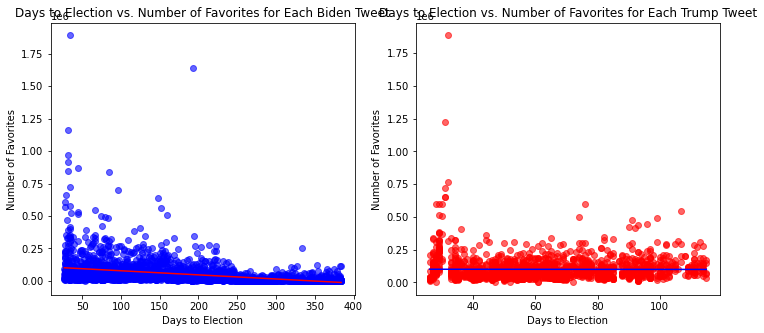

Regression slope (Biden): -316.70
Test statistic for the significance of the slope of the regression line coefficient (Biden): -21.41
P value for the significance of the slope of the regression line coefficient (Biden): 0.000

Regression slope (Trump): -16.27
Test statistic for the significance of the slope of the regression line coefficient (Trump): -0.15
P value for the significance of the slope of the regression line coefficient (Trump): 0.881


In [36]:
# Biden favorites vs. days to election

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

b_days_favorites_model = linear_model.LinearRegression().fit(biden_tweets[["days_to_election"]], biden_tweets["favourite"])
b_days_favorites_predict = b_days_favorites_model.predict(biden_tweets[["days_to_election"]])

ax1.scatter(biden_tweets["days_to_election"], biden_tweets["favourite"], alpha = 0.6, color = "blue")
ax1.plot(biden_tweets["days_to_election"], b_days_favorites_predict, c = "red")
ax1.set_title("Days to Election vs. Number of Favorites for Each Biden Tweet")
ax1.set_xlabel("Days to Election")
ax1.set_ylabel("Number of Favorites")

t_days_favorites_model = linear_model.LinearRegression().fit(trump_tweets[["days_to_election"]], trump_tweets["favourite"])
t_days_favorites_predict = t_days_favorites_model.predict(trump_tweets[["days_to_election"]])

ax2.scatter(trump_tweets["days_to_election"], trump_tweets["favourite"], alpha = 0.6, color = "red")
ax2.plot(trump_tweets["days_to_election"], t_days_favorites_predict, c = "blue")
ax2.set_title("Days to Election vs. Number of Favorites for Each Trump Tweet")
ax2.set_xlabel("Days to Election")
ax2.set_ylabel("Number of Favorites")

plt.show()

b_days_favorites_est = sm.OLS(biden_tweets["favourite"], sm.add_constant(biden_tweets[["days_to_election"]]))
b_days_favorites_est2 = b_days_favorites_est.fit()
# print(b_days_favorites_est2.summary()) # Prints the whole summary table for the regression line
print("Regression slope (Biden): " + "{:.2f}".format(b_days_favorites_est2.params[1]))
print("Test statistic for the significance of the slope of the regression line coefficient (Biden): " + "{:.2f}".format(b_days_favorites_est2.tvalues[1]))
print("P value for the significance of the slope of the regression line coefficient (Biden): " + "{:.3f}".format(b_days_favorites_est2.pvalues[1]))

print("")

t_days_favorites_est = sm.OLS(trump_tweets["favourite"], sm.add_constant(trump_tweets[["days_to_election"]]))
t_days_favorites_est2 = t_days_favorites_est.fit()
# print(t_days_favorites_est2.summary())
print("Regression slope (Trump): " + "{:.2f}".format(t_days_favorites_est2.params[1]))
print("Test statistic for the significance of the slope of the regression line coefficient (Trump): " + "{:.2f}".format(t_days_favorites_est2.tvalues[1]))
print("P value for the significance of the slope of the regression line coefficient (Trump): " + "{:.3f}".format(t_days_favorites_est2.pvalues[1]))

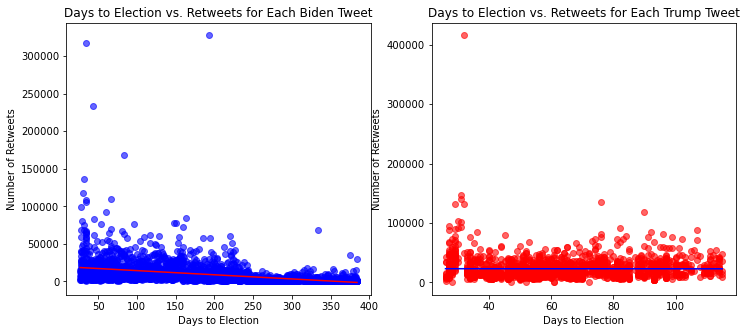

Regression slope (Biden): -55.56
Test statistic for the significance of the slope of the regression line coefficient (Biden): -22.83
P value for the significance of the slope of the regression line coefficient (Biden): 0.000

Regression slope (Trump): -1.89
Test statistic for the significance of the slope of the regression line coefficient (Trump): -0.09
P value for the significance of the slope of the regression line coefficient (Trump): 0.929


In [37]:
# Biden retweets vs. days to election

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

b_days_retweets_model = linear_model.LinearRegression().fit(biden_tweets[["days_to_election"]], biden_tweets["retweets"])
b_days_retweets_predict = b_days_retweets_model.predict(biden_tweets[["days_to_election"]])

ax1.scatter(biden_tweets["days_to_election"], biden_tweets["retweets"], alpha = 0.6, color = "blue")
ax1.plot(biden_tweets["days_to_election"], b_days_retweets_predict, c = "red")
ax1.set_title("Days to Election vs. Retweets for Each Biden Tweet")
ax1.set_xlabel("Days to Election")
ax1.set_ylabel("Number of Retweets")

t_days_retweets_model = linear_model.LinearRegression().fit(trump_tweets[["days_to_election"]], trump_tweets["retweets"])
t_days_retweets_predict = t_days_retweets_model.predict(trump_tweets[["days_to_election"]])

ax2.scatter(trump_tweets["days_to_election"], trump_tweets["retweets"], alpha = 0.6, color = "red")
ax2.plot(trump_tweets["days_to_election"], t_days_retweets_predict, c = "blue")
ax2.set_title("Days to Election vs. Retweets for Each Trump Tweet")
ax2.set_xlabel("Days to Election")
ax2.set_ylabel("Number of Retweets")

plt.show()

b_days_retweets_est = sm.OLS(biden_tweets["retweets"], sm.add_constant(biden_tweets[["days_to_election"]]))
b_days_retweets_est2 = b_days_retweets_est.fit()
# print(b_days_retweets_est2.summary())
print("Regression slope (Biden): " + "{:.2f}".format(b_days_retweets_est2.params[1]))
print("Test statistic for the significance of the slope of the regression line coefficient (Biden): " + "{:.2f}".format(b_days_retweets_est2.tvalues[1]))
print("P value for the significance of the slope of the regression line coefficient (Biden): " + "{:.3f}".format(b_days_retweets_est2.pvalues[1]))

print("")

t_days_retweets_est = sm.OLS(trump_tweets["retweets"], sm.add_constant(trump_tweets[["days_to_election"]]))
t_days_retweets_est2 = t_days_retweets_est.fit()
# print(t_days_retweets_est2.summary())
print("Regression slope (Trump): " + "{:.2f}".format(t_days_retweets_est2.params[1]))
print("Test statistic for the significance of the slope of the regression line coefficient (Trump): " + "{:.2f}".format(t_days_retweets_est2.tvalues[1]))
print("P value for the significance of the slope of the regression line coefficient (Trump): " + "{:.3f}".format(t_days_retweets_est2.pvalues[1]))

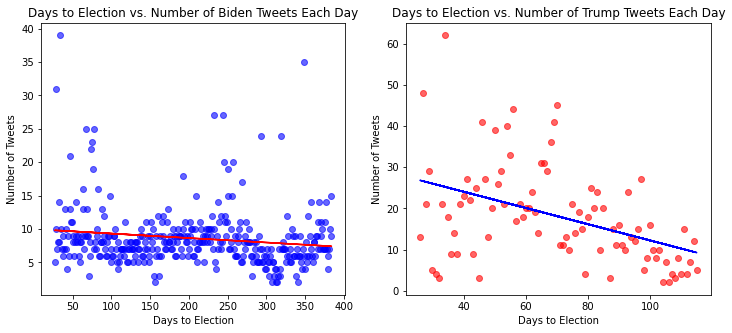

Regression slope (Biden): -0.01
Test statistic for the significance of the slope of the regression line coefficient (Biden): -2.88
P value for the significance of the slope of the regression line coefficient (Biden): 0.004

Regression slope (Trump): -0.20
Test statistic for the significance of the slope of the regression line coefficient (Trump): -4.48
P value for the significance of the slope of the regression line coefficient (Trump): 0.000


In [44]:
# Biden number of tweets vs. days to election

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

b_days_tweets_model = linear_model.LinearRegression().fit(biden_tweetsbyday[["days_to_election"]], biden_tweetsbyday["tweets_each_day"])
b_days_tweets_predict = b_days_tweets_model.predict(biden_tweetsbyday[["days_to_election"]])

ax1.scatter(biden_tweetsbyday["days_to_election"], biden_tweetsbyday["tweets_each_day"], alpha = 0.6, color = "blue")
ax1.plot(biden_tweetsbyday["days_to_election"], b_days_tweets_predict, c = "red")
ax1.set_title("Days to Election vs. Number of Biden Tweets Each Day")
ax1.set_xlabel("Days to Election")
ax1.set_ylabel("Number of Tweets")

t_days_tweets_model = linear_model.LinearRegression().fit(trump_tweetsbyday[["days_to_election"]], trump_tweetsbyday["tweets_each_day"])
t_days_tweets_predict = t_days_tweets_model.predict(trump_tweetsbyday[["days_to_election"]])

ax2.scatter(trump_tweetsbyday["days_to_election"], trump_tweetsbyday["tweets_each_day"], alpha = 0.6, color = "red")
ax2.plot(trump_tweetsbyday["days_to_election"], t_days_tweets_predict, c = "blue")
ax2.set_title("Days to Election vs. Number of Trump Tweets Each Day")
ax2.set_xlabel("Days to Election")
ax2.set_ylabel("Number of Tweets")

plt.show()

b_days_tweets_est = sm.OLS(biden_tweetsbyday["tweets_each_day"], sm.add_constant(biden_tweetsbyday[["days_to_election"]]))
b_days_tweets_est2 = b_days_tweets_est.fit()
# print(b_days_tweets_est2.summary())
print("Regression slope (Biden): " + "{:.2f}".format(b_days_tweets_est2.params[1]))
print("Test statistic for the significance of the slope of the regression line coefficient (Biden): " + "{:.2f}".format(b_days_tweets_est2.tvalues[1]))
print("P value for the significance of the slope of the regression line coefficient (Biden): " + "{:.3f}".format(b_days_tweets_est2.pvalues[1]))

print("")

t_days_tweets_est = sm.OLS(trump_tweetsbyday["tweets_each_day"], sm.add_constant(trump_tweetsbyday[["days_to_election"]]))
t_days_tweets_est2 = t_days_tweets_est.fit()
# print(t_days_tweets_est2.summary())
print("Regression slope (Trump): " + "{:.2f}".format(t_days_tweets_est2.params[1]))
print("Test statistic for the significance of the slope of the regression line coefficient (Trump): " + "{:.2f}".format(t_days_tweets_est2.tvalues[1]))
print("P value for the significance of the slope of the regression line coefficient (Trump): " + "{:.3f}".format(t_days_tweets_est2.pvalues[1]))

# Optional Analysis

In [39]:
from collections import Counter 
from string import punctuation
  
allbidenwords = ""

#concatenate texts in all of biden's post into one string, making them all lowercase
for i in range(len(biden_tweets)):
    allbidenwords+=biden_tweets['full_text'][i].lower()

#transforms the concatenated string into a list of all the words in the string
allbidenwords2 = allbidenwords.split()

#download the nltk packages – action required running this code: go to Corpora, and download "stopwords"
import nltk

from nltk.corpus import stopwords

#obtain the english stopwords

stopwords = stopwords.words('english')

#create and add our own list of english stopwords

additionalstopwords=['',"—","-","need","get","make","every","one","us","take","it’s","it.","we're","i'll","i'm","let","can't","going","would"]

for i in range(len(additionalstopwords)):
    stopwords.append(additionalstopwords[i])
    
#remove all leading and trailing punctuations of biden's words
for i in range(len(allbidenwords2)):
    allbidenwords2[i]=allbidenwords2[i].strip(punctuation)
    
#create a new counter object which we will use to count the words and their frequencies

Counter = Counter(allbidenwords2) 

#returns the top-200 (leave a large enough margin) most freqeunt words and their count
bidenmostfrequentwords = Counter.most_common(200)

#filter out the english stopwords from the list of words

bidenmostfrequentwords = [(word, count) for word, count in bidenmostfrequentwords if word not in stopwords]
  
#print only the top-30 most frequent words and their count
print(bidenmostfrequentwords[:30]) 


[('trump', 796), ('president', 737), ('donald', 499), ('nation', 346), ('american', 335), ('country', 306), ('people', 289), ('day', 271), ('time', 241), ('crisis', 220), ('care', 214), ('health', 212), ('help', 211), ('together', 207), ('today', 206), ('america', 197), ('americans', 183), ('work', 176), ('years', 175), ('white', 170), ('back', 168), ('know', 157), ('campaign', 151), ('better', 148), ('house', 143), ('covid-19', 142), ('world', 137), ('like', 137), ('must', 134), ('never', 132)]


In [40]:
from collections import Counter 
from string import punctuation

alltrumpwords = ""

#concatenate texts in all of trump's post into one string, making them all lowercase
for i in range(len(trump_tweets)):
    alltrumpwords+=trump_tweets['full_text'][i].lower()

#transforms the concatenated string into a list of all the words in the string
alltrumpwords2 = alltrumpwords.split()

#download the nltk packages – action required running this code: go to Corpora, and download "stopwords"
import nltk

#nltk.download() <--unhighlight this code to do the installation

from nltk.corpus import stopwords

#obtain the english stopwords

stopwords = stopwords.words('english')

#create and add our own list of english stopwords

additionalstopwords=['',"—","-","need","get","make","every","one","us","take","it’s","it.","we're","i'll","i'm","let","can't","going","would"]

for i in range(len(additionalstopwords)):
    stopwords.append(additionalstopwords[i])
    
#remove all leading and trailing punctuations of trump's words
for i in range(len(alltrumpwords2)):
    alltrumpwords2[i]=alltrumpwords2[i].strip(punctuation)
    
#create a new counter object which we will use to count the words and their frequencies

Counter = Counter(alltrumpwords2) 

#returns the top-200 (leave a large enough margin) most freqeunt words and their count
trumpmostfrequentwords = Counter.most_common(200)

#filter out the english stopwords from the list of words

trumpmostfrequentwords = [(word, count) for word, count in trumpmostfrequentwords if word not in stopwords]
  
#print only the top-30 most frequent words and their count
print(trumpmostfrequentwords[:30])

[('great', 200), ('amp', 194), ('biden', 131), ('people', 120), ('joe', 99), ('news', 94), ('fake', 88), ('never', 84), ('vote', 78), ('country', 74), ('big', 73), ('even', 71), ('total', 70), ('democrats', 69), ('president', 69), ('many', 65), ('left', 64), ('like', 61), ('new', 61), ('want', 60), ('back', 60), ('complete', 59), ('maga', 58), ('endorsement', 58), ('thank', 57), ('years', 56), ('state', 56), ('election', 56), ('win', 53), ('radical', 53)]


Next, we sentiment code the top 30 words from each candidates into three categories: positive, neutral, and negative.

In [41]:
print("Biden's top-30 most frequent words are:\n")
print(bidenmostfrequentwords[:30])
print("\nTrump's top-30 most frequent words are:\n")
print(trumpmostfrequentwords[:30])

Biden's top-30 most frequent words are:

[('trump', 796), ('president', 737), ('donald', 499), ('nation', 346), ('american', 335), ('country', 306), ('people', 289), ('day', 271), ('time', 241), ('crisis', 220), ('care', 214), ('health', 212), ('help', 211), ('together', 207), ('today', 206), ('america', 197), ('americans', 183), ('work', 176), ('years', 175), ('white', 170), ('back', 168), ('know', 157), ('campaign', 151), ('better', 148), ('house', 143), ('covid-19', 142), ('world', 137), ('like', 137), ('must', 134), ('never', 132)]

Trump's top-30 most frequent words are:

[('great', 200), ('amp', 194), ('biden', 131), ('people', 120), ('joe', 99), ('news', 94), ('fake', 88), ('never', 84), ('vote', 78), ('country', 74), ('big', 73), ('even', 71), ('total', 70), ('democrats', 69), ('president', 69), ('many', 65), ('left', 64), ('like', 61), ('new', 61), ('want', 60), ('back', 60), ('complete', 59), ('maga', 58), ('endorsement', 58), ('thank', 57), ('years', 56), ('state', 56), ('el

In [42]:
bidenpositive=["nation","american","country","people","care","health","help","together","america","americans","better","like"]
bidenneutral=["trump","president","donald","day","time","today","work","years","white","back","know","campaign","house","covid-19","world","must"]
bidennegative=["crisis","never"]

print(len(bidenpositive))
print(len(bidenneutral))
print(len(bidennegative))

12
16
2


In [43]:
trumppositive=["great","people","vote","country","big","many","like","new","want","complete","maga","endorsement","thank","win"]
trumpneutral=["amp","biden","joe","news","even","total","democrats","president","left","back","years","state","election"]
trumpnegative=["fake","never","radical"]

print(len(trumppositive))
print(len(trumpneutral))
print(len(trumpnegative))

14
13
3


As shown above, 12 out of the top-30 most frequently used words by Biden are positive, 16 are neutral, and 2 are negative. On the other hand, 14 out of the top-30 most frequently used words by trump are positive, 13 are neutral, and 3 are negative. This mirrors our results of sentiment analysis, which found that Trump had a lot more positive tweets than Biden (as seen through 14 > 12) as well as more negative tweets than Biden (as seen through 3 > 2). This adds further credibility to our findings that Trump's results seem more polarized and subjective than Biden's, as demonstrated in the polarity vs subjectivity plots.